In [11]:
print("Nama : Diah Ayu Puspasari")
print("NIM : 0110223052")

Nama : Diah Ayu Puspasari
NIM : 0110223052


In [2]:
import pandas as pd
import numpy as np

# mengimport data csv 
mydata = pd.read_csv('Spotify_Most_Streamed_Songs.csv')
mydata

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found


In [9]:
# menghitung rata rata tingkat energi pada lagu yang sering diputar pada Spotify
mydata['energy_%'].mean()

np.float64(64.2791185729276)

In [10]:
# menghitung nilai tengah tingkat energi pada lagu yang sering diputar pada Spotify
mydata['energy_%'].median()

np.float64(66.0)

In [12]:
# menghitung tingkat energi yang paling banyak muncul pada lagu yang sering diputar pada Spotify
mydata['energy_%'].mode()

0    74
Name: energy_%, dtype: int64

In [13]:
# Menghitung Kuartil pertama (Q1)
q1 = mydata['energy_%'].quantile(0.25)
print("Q1 : ", q1)

# Menghitung Kuartil pertama (Q3)
q3 = mydata['energy_%'].quantile(0.75)
print("Q3 : ", q3)

iqr = q3 - q1 
print("IQR : ", iqr)

Q1 :  53.0
Q3 :  77.0
IQR :  24.0


<Axes: >

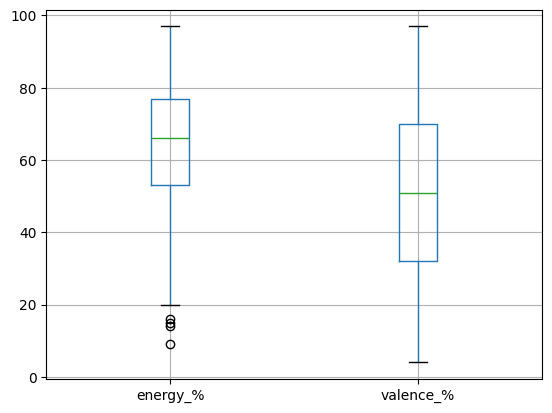

In [8]:
mydata.boxplot(column=['energy_%', 'valence_%'])

In [19]:
import pandas as pd
outlier_data = {
    'streams': [51, 155],
    'valence_%': [33, 320],
    'energy_%': [45, 160]
}

# Membuat dataframe outlier
outlier_mydata = pd.DataFrame(outlier_data)
mydata = pd.concat([mydata, outlier_mydata], ignore_index=True)
print(mydata)

                              track_name    artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook           2.0   
1                                   LALA       Myke Towers           1.0   
2                                vampire    Olivia Rodrigo           1.0   
3                           Cruel Summer      Taylor Swift           1.0   
4                         WHERE SHE GOES         Bad Bunny           1.0   
..                                   ...               ...           ...   
956                                  NaN               NaN           NaN   
957                                  NaN               NaN           NaN   
958                                  NaN               NaN           NaN   
959                                  NaN               NaN           NaN   
960                                  NaN               NaN           NaN   

     released_year  released_month  released_day  in_spotify_playlists  \
0           2

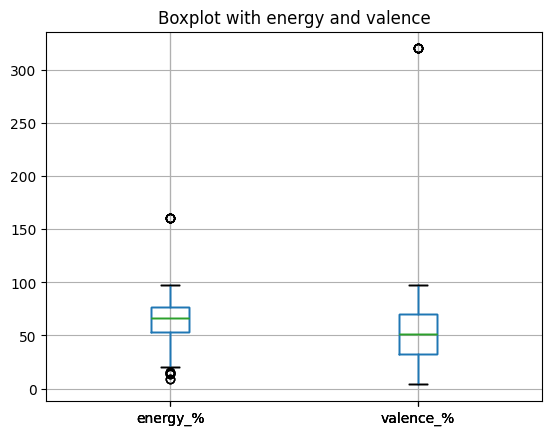

In [20]:
import matplotlib.pyplot as plt

# membuat boxplot energi dan valence dengan outliers
mydata.boxplot(column=['energy_%', 'valence_%'])
plt.title('Boxplot with energy and valence')
plt.show()

In [24]:
# Menghitung Kuartil pertama (Q1)
q1 = mydata['energy_%'].quantile(0.25)
print("Q1 : ", q1)

# Menghitung Kuartil pertama (Q3)
q3 = mydata['energy_%'].quantile(0.75)
print("Q3 : ", q3)

iqr = q3 - q1 
print("IQR : ", iqr)

# Menghitung batas bawah (Lower Bound) dan batas atas (Upper Bound) untuk outlier 
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Temukan oitlie dalam DataFrame 
outliers = mydata[(mydata['energy_%'] < lower_bound) | (mydata['energy_%'] > upper_bound)]

print("Outlier energy_%:")
print(outliers)

Q1 :  53.0
Q3 :  77.0
IQR :  24.0
Outlier energy_%:
                                            track_name artist(s)_name  \
17   What Was I Made For? [From The Motion Picture ...  Billie Eilish   
326                                     Heart To Heart    Mac DeMarco   
460  The Christmas Song (Merry Christmas To You) - ...  Nat King Cole   
940                                      Sweet Nothing   Taylor Swift   
954                                                NaN            NaN   
956                                                NaN            NaN   
958                                                NaN            NaN   
960                                                NaN            NaN   

     artist_count  released_year  released_month  released_day  \
17            1.0         2023.0             7.0          13.0   
326           1.0         2019.0             5.0          10.0   
460           1.0         1946.0            11.0           1.0   
940           1.0         

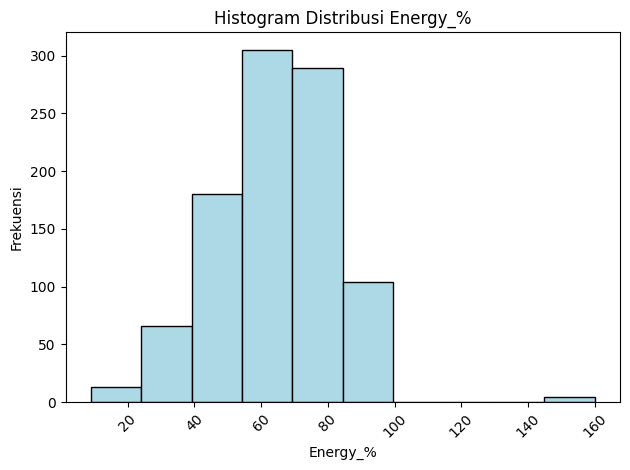

In [28]:
data_energy = mydata["energy_%"]

# Buat histogram
n, bins, patches = plt.hist(data_energy, bins=10, color='lightblue', edgecolor='black')

# Tambahkan Label
plt.title('Histogram Distribusi Energy_%')
plt.xlabel('Energy_%')
plt.ylabel('Frekuensi')

# Memperbaiki tampilan label sumbu x
plt.xticks(rotation=45)  # Rotasi label sumbu x 45 derajat agar tidak bertumpuk

# Tampilkan histogram
plt.tight_layout()  # Agar label tidak terpotong
plt.show()

In [29]:
# Menghitung Q1 dan Q3 untuk kolom energy_% dan valence_%
q1_energy = mydata['energy_%'].quantile(0.25)
q3_energy = mydata['energy_%'].quantile(0.75)
q1_valence = mydata['valence_%'].quantile(0.25)
q3_valence = mydata['valence_%'].quantile(0.75)

# Menghitung Interquartile Range (IQR) untuk energy_% dan valence_%
iqr_energy = q3_energy - q1_energy
iqr_valence = q3_valence - q1_valence

# Menghitung batas bawah dan batas atas untuk outlier energy_% dan valence_%
lower_bound_energy = q1_energy - 1.5 * iqr_energy
upper_bound_energy = q3_energy + 1.5 * iqr_energy
lower_bound_valence = q1_valence - 1.5 * iqr_valence
upper_bound_valence = q3_valence + 1.5 * iqr_valence

# Mengidentifikasi baris outlier berdasarkan ciri-ciri yang unik
outliers_condition = ((mydata['energy_%'] > upper_bound_energy) | (mydata['energy_%'] < lower_bound_energy)) | \
                     ((mydata['valence_%'] > upper_bound_valence) | (mydata['valence_%'] < lower_bound_valence))

# Drop baris yang memenuhi kondisi di atas (outliers)
mydata_cleaned = mydata[~outliers_condition]  # Tanda ~ untuk negasi (tidak termasuk kondisi outlier)

# Menampilkan data setelah penghapusan outliers
print(mydata_cleaned.tail())

    track_name artist(s)_name  artist_count  released_year  released_month  \
952      Alone      Burna Boy           1.0         2022.0            11.0   
953        NaN            NaN           NaN            NaN             NaN   
955        NaN            NaN           NaN            NaN             NaN   
957        NaN            NaN           NaN            NaN             NaN   
959        NaN            NaN           NaN            NaN             NaN   

     released_day  in_spotify_playlists  in_spotify_charts   streams  \
952           4.0                 782.0                2.0  96007391   
953           NaN                   NaN                NaN        51   
955           NaN                   NaN                NaN        51   
957           NaN                   NaN                NaN        51   
959           NaN                   NaN                NaN        51   

     in_apple_playlists  ...  key   mode  danceability_% valence_%  energy_%  \
952               

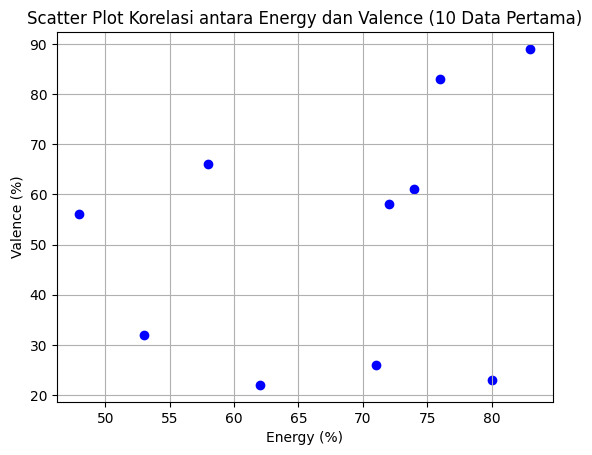

In [34]:
import matplotlib.pyplot as plt

# Buat scatter plot dengan energy_% sebagai sumbu X dan valence_% sebagai sumbu Y
plt.scatter(subset_data['energy_%'], subset_data['valence_%'], color='blue', marker='o')

# Tambahkan Label
plt.title('Scatter Plot Korelasi antara Energy dan Valence (10 Data Pertama)')
plt.xlabel('Energy (%)')
plt.ylabel('Valence (%)')

# Tampilkan grid dan plot
plt.grid(True)
plt.show()

In [33]:
# Menghitung koefisien korelasi antara energy_% dan valence_%
correlation = subset_data['energy_%'].corr(subset_data['valence_%'])
print("Koefisien Korelasi:", correlation)

Koefisien Korelasi: 0.2724220120429407
